# PROJECT  : Insurance Prediction Challenge

## Compiled by: Mashele G.P

## Project overview/Description
Recently, there has been an increase in the number of building collapse in Lagos and major cities in Nigeria. Olusola Insurance Company offers a building insurance policy that protects buildings against damages that could be caused by a fire or vandalism, by a flood or storm.

## Problem statement
You have been appointed as the Lead Data Analyst to build a predictive model to determine if a building will have an insurance claim during a certain period or not. You will have to predict the probability of having at least one claim over the insured period of the building.The model will be based on the building characteristics. The target variable, Claim, is a:
* 1 if the building has at least a claim over the insured period. <br>
* 0 if the building doesn’t have a claim over the insured period. <br>

## Data Description
* Customer Id:Identification number for the Policy holder.<br>
* YearOfObservation:year of observation for the insured policy. <br>	
* Insured_Period:"duration of insurance policy in Olusola Insurance. (Ex: Full year insurance, Policy Duration = 1	 6 months = 0.5". <br>
* Residential:is the building a residential building or not. <br>
* Building_Painted:"is the building painted or not (N-Painted, V-Not Painted)" <br>	
* Building_Fenced:"is the building fence or not (N-Fenced, V-Not Fenced)". <br>
* Garden: building has garden or not (V-has garden O-no garden) <br>
* Settlement: Area where the building is located. (R- rural areaU- urban area) <br>
* Building Dimension: Size of the insured building in m2. <br>	
* Building_Type:"The type of building (Type 1, 2, 3, 4)". <br>	
* Date_of_Occupancy:date building was first occupied. <br>	
* NumberOfWindows:number of windows in the building. <br>	
* Geo Code: Geographical Code of the Insured building <br>	
* Claim: "target variable. (0: no claim, 1: at least one claim over insured period)."<br>

### Import the necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Libaries to assist with visualization of data
import matplotlib.pyplot as plt
import seaborn as sns
# To tune model, get different metric scores, and split data
from sklearn.metrics import (mean_absolute_error,f1_score,accuracy_score,recall_score, precision_score)
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
# To be used for data scaling 
from sklearn.preprocessing import StandardScaler
# To do hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)
# To help with model building
from catboost import CatBoostClassifier
# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)
# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [181]:
# Now lets read the train and test  dataset
train_data = pd.read_csv("train_data(insurance).csv",sep=",")
data_test = pd.read_csv("test_data(Insurance).csv",sep=",")

In [182]:
# Print the first five rows of the  train dataset
train_data.head()  

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.000,0,N,V,V,U,290.000,1,1960.000,.,1053,0
1,H2037,2015,1.000,0,V,N,O,R,490.000,1,1850.000,4,1053,0
2,H3802,2014,1.000,0,N,V,V,U,595.000,1,1960.000,.,1053,0
3,H3834,2013,1.000,0,V,V,V,U,2840.000,1,1960.000,.,1053,0
4,H5053,2014,1.000,0,V,N,O,R,680.000,1,1800.000,3,1053,0


In [183]:
# Print the last five rows of the dataset
train_data.tail()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
7155,H5290,2012,1.000,1,V,V,V,U,NaN,1,2001.000,.,NaN,0
7156,H5926,2013,1.000,0,V,V,V,U,NaN,2,1980.000,.,NaN,1
7157,H6204,2016,0.038,0,V,V,V,U,NaN,1,1992.000,.,NaN,0
7158,H6537,2013,1.000,0,V,V,V,U,NaN,1,1972.000,.,NaN,0
7159,H7470,2014,1.000,0,V,V,V,U,NaN,1,2004.000,.,NaN,0


In [184]:
train_data.shape

(7160, 14)

In [185]:
print(f" The banking  training dataset consist of {train_data.shape[0]} rows and {train_data.shape[1]} columns")

 The banking  training dataset consist of 7160 rows and 14 columns


In [186]:
print(f" The banking  testing dataset consist of {test_data.shape[0]} rows and {test_data.shape[1]} columns")

 The banking  testing dataset consist of 3047 rows and 12 columns


In [187]:
# Code to display the dataset data types
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


### Observation:
* The financial sector training dataset consist of 23524 rows and 13 columns. <br>
* 3 of those columns are integer data types. <br>
* 10(ten) are object data types. <br>
*  memory usage is 2.3 MB(Megabytes).

In [188]:
## Drop the customer ID 
train_data=train_data.drop(columns=['Customer Id'],axis=1)

In [189]:
# Now lets recheck the dimensions of the train dataset
train_data.shape

(7160, 13)

In [190]:
 # Code to print the statistical summary of the numerical columns in a  dataset
train_data.describe().T  

,count,mean,std,min,25%,50%,75%,max
YearOfObservation,7160.000,2013.670,1.384,2012.000,2012.000,2013.000,2015.000,2016.000
Insured_Period,7160.000,0.910,0.240,0.000,0.997,1.000,1.000,1.000
Residential,7160.000,0.305,0.461,0.000,0.000,0.000,1.000,1.000
Building Dimension,7054.000,1883.728,2278.158,1.000,528.000,1083.000,2289.750,20940.000
Building_Type,7160.000,2.186,0.941,1.000,2.000,2.000,3.000,4.000
Date_of_Occupancy,6652.000,1964.456,36.002,1545.000,1960.000,1970.000,1980.000,2016.000
Claim,7160.000,0.228,0.420,0.000,0.000,0.000,0.000,1.000


In [191]:
# code to check for missing values in a dataset
train_data.isnull().sum()

YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [192]:
print(f"The training set consist of {train_data.isnull().sum().sum()} missing values")

The training set consist of 723 missing values


In [193]:
## Replace the Number of Windows objects with zero and 10
train_data['NumberOfWindows'] = train_data['NumberOfWindows'].astype(str).str.replace('   .',"0")
train_data['NumberOfWindows'] = train_data['NumberOfWindows'].astype(str).str.replace('>=10',"10")
## Now set the NumberOFWindows columns as an integer
train_data['NumberOfWindows'] = train_data['NumberOfWindows'].astype(int)
### Set the YearofObservation column as an object data type
train_data['YearOfObservation'] = train_data['YearOfObservation'].astype(str)
### Set the date of occupancy as an object column
train_data['Date_of_Occupancy'] = train_data['Date_of_Occupancy'].astype(str)

In [194]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearOfObservation   7160 non-null   object 
 1   Insured_Period      7160 non-null   float64
 2   Residential         7160 non-null   int64  
 3   Building_Painted    7160 non-null   object 
 4   Building_Fenced     7160 non-null   object 
 5   Garden              7153 non-null   object 
 6   Settlement          7160 non-null   object 
 7   Building Dimension  7054 non-null   float64
 8   Building_Type       7160 non-null   int64  
 9   Date_of_Occupancy   7160 non-null   object 
 10  NumberOfWindows     7160 non-null   int32  
 11  Geo_Code            7058 non-null   object 
 12  Claim               7160 non-null   int64  
dtypes: float64(2), int32(1), int64(3), object(7)
memory usage: 699.3+ KB


In [195]:
# Code to check for duplicates in the dataset
train_data.duplicated().sum()

12

In [196]:
train_data=train_data.drop_duplicates()

In [197]:
train_data.duplicated().sum()

0

### Testing dataset

In [211]:
data_test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000,0,V,N,O,R,300.000,1,1960.000,3,3310
1,H11921,2016,0.997,0,V,N,O,R,300.000,1,1960.000,3,3310
2,H9805,2013,0.370,0,V,V,V,U,790.000,1,1960.000,.,3310
3,H7493,2014,1.000,0,V,N,O,R,1405.000,1,2004.000,3,3321
4,H7494,2016,1.000,0,V,N,O,R,1405.000,1,2004.000,3,3321


In [212]:
data_test.shape

(3069, 13)

In [213]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         3069 non-null   object 
 1   YearOfObservation   3069 non-null   int64  
 2   Insured_Period      3069 non-null   float64
 3   Residential         3069 non-null   int64  
 4   Building_Painted    3069 non-null   object 
 5   Building_Fenced     3069 non-null   object 
 6   Garden              3065 non-null   object 
 7   Settlement          3069 non-null   object 
 8   Building Dimension  3056 non-null   float64
 9   Building_Type       3069 non-null   int64  
 10  Date_of_Occupancy   2341 non-null   float64
 11  NumberOfWindows     3069 non-null   object 
 12  Geo_Code            3056 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 311.8+ KB


In [214]:
test_data = data_test.copy()

In [215]:
print(f" The banking  testing dataset consist of {test_data.shape[0]} rows and {test_data.shape[1]} columns")

 The banking  testing dataset consist of 3069 rows and 13 columns


In [216]:
## Drop the customer ID 
test_data=test_data.drop(columns=['Customer Id'],axis=1)

In [217]:
## Replace the Number of Windows objects with zero and 10
test_data['NumberOfWindows'] = test_data['NumberOfWindows'].astype(str).str.replace('   .',"0")
test_data['NumberOfWindows'] = test_data['NumberOfWindows'].astype(str).str.replace('>=10',"10")
## Now set the NumberOFWindows columns as an integer
test_data['NumberOfWindows'] = test_data['NumberOfWindows'].astype(int)
### Set the YearofObservation column as an object data type
test_data['YearOfObservation'] = test_data['YearOfObservation'].astype(str)
### Set the date of occupancy as an object column
test_data['Date_of_Occupancy'] = test_data['Date_of_Occupancy'].astype(str)

In [218]:
test_data.shape

(3069, 12)

In [219]:
# Code to print the statistical summary of the numerical columns in a  dataset
test_data.describe().T  

,count,mean,std,min,25%,50%,75%,max
Insured_Period,3069.000,0.923,0.219,0.000,1.000,1.000,1.000,1.000
Residential,3069.000,0.224,0.417,0.000,0.000,0.000,0.000,1.000
Building Dimension,3056.000,1666.791,2251.181,1.000,470.000,900.000,1957.000,30745.000
Building_Type,3069.000,2.359,0.998,1.000,2.000,2.000,3.000,4.000
NumberOfWindows,3069.000,1.165,2.121,0.000,0.000,0.000,2.000,10.000


In [220]:
# Code to check for duplicates in the dataset
test_data.duplicated().sum()

22

In [221]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearOfObservation   3069 non-null   object 
 1   Insured_Period      3069 non-null   float64
 2   Residential         3069 non-null   int64  
 3   Building_Painted    3069 non-null   object 
 4   Building_Fenced     3069 non-null   object 
 5   Garden              3065 non-null   object 
 6   Settlement          3069 non-null   object 
 7   Building Dimension  3056 non-null   float64
 8   Building_Type       3069 non-null   int64  
 9   Date_of_Occupancy   3069 non-null   object 
 10  NumberOfWindows     3069 non-null   int32  
 11  Geo_Code            3056 non-null   object 
dtypes: float64(2), int32(1), int64(2), object(7)
memory usage: 275.9+ KB


# Exploratory data analysis(EDA)

In [222]:
 # Code to make a copy of the original  train dataset
data = train_data.copy() 

In [223]:
data.shape

(7148, 13)

## Univariate data analysis

### Numerical data

In [224]:
# Select numerical colums from the dataset
numerical_columns =data.select_dtypes("number").columns

In [225]:
### Code to create a function to display histogram and boxplot for numerical dataset
def box_histplot(data,item):
    
    plt.figure(figsize=(15,5))  # increase the size of the plot
    plt.title(f"Histogram for {item}")      # Give the graph a title
    plt.xlabel(item)  # change the label on the x-axis
    plt.ylabel("frequency")  # change the label on the y-axis
    sns.histplot(data=data,x=item,kde=False);  # histogram for numerical dataset
    plt.axvline(data[item].mean(),color="black",linestyle="--")
    plt.axvline(data[item].median(),color="red",linestyle="-")
    plt.show()
    plt.figure(figsize=(15,5))  # increase the size of the plot
    plt.title(f"Boxplot for {item}")          # Give the plot a suitable title
    sns.boxplot(data=data,x=item,showmeans=True);  # Boxplot for numerical dataset
    plt.xlabel(item)                     # change the label on the x-axis
    plt.show()

In [ ]:
# Code the call the function to display the histogram and boxplots for numericl columns
for item in data[numerical_columns]:
    box_histplot(data,item)

## Categorical data analysis:

In [32]:
# Code to select categorical columns
categorical_data = data.select_dtypes("object").columns  

In [33]:
categorical_data

Index(['YearOfObservation', 'Building_Painted', 'Building_Fenced', 'Garden',
       'Settlement', 'Date_of_Occupancy', 'Geo_Code'],
      dtype='object')

In [34]:
## Create a function to display the bar graphs for categorical data columns
def count_plot(data,item):
    plt.figure(figsize=(5,4))  # increase the size of the plot
    sns.countplot(data=data , x=item); # countplot for categorical columns
    plt.title(f"Countplot for {item}")  # add the title on the countplot
    plt.ylabel("frequency")    # add the label on the y-axis
    plt.xticks(rotation=90) 
    plt.show()

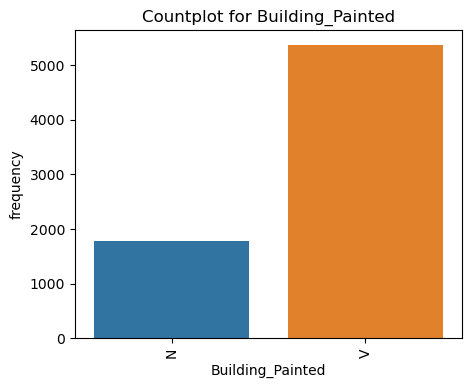

In [35]:
# Print the countplot for attrition
count_plot(data,'Building_Painted')

In [36]:
data['Building_Painted'].value_counts(normalize=True)

Building_Painted
V   0.752
N   0.248
Name: proportion, dtype: float64

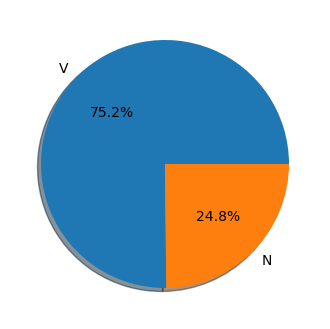

In [37]:
# Create a pie chart to show the percentage for Business Travel 
plt.figure(figsize=(4,5))
values = data['Building_Painted'].value_counts() /data.shape[0]
plt.pie(values,labels=values.keys(),autopct="%1.1f%%",shadow=True)
plt.show()

### Observation
About 86% of the banking data indicate that individuals have no banking accounts whereas 14% does have a bank account.

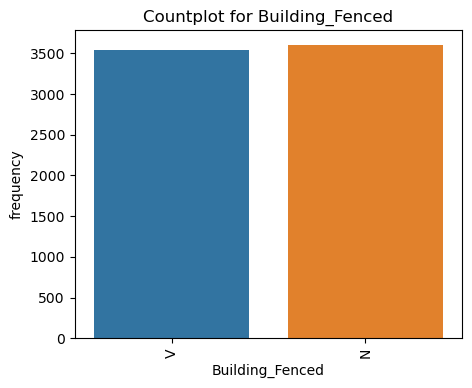

In [38]:
# Print the countplot for loaction types
count_plot(data,'Building_Fenced')

In [39]:
data['Building_Fenced'].value_counts(normalize=True)

Building_Fenced
N   0.504
V   0.496
Name: proportion, dtype: float64

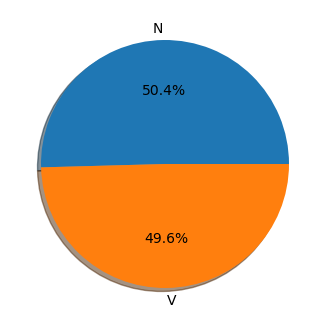

In [40]:
# Create a pie chart to show the percentage for Business Travel 
plt.figure(figsize=(4,5))
values = data['Building_Fenced'].value_counts() /data.shape[0]
plt.pie(values,labels=values.keys(),autopct="%1.1f%%",shadow=True)
plt.show()

### Observation
About 61% of the respondent are from rural areas. <br>
39% are from Urban areas

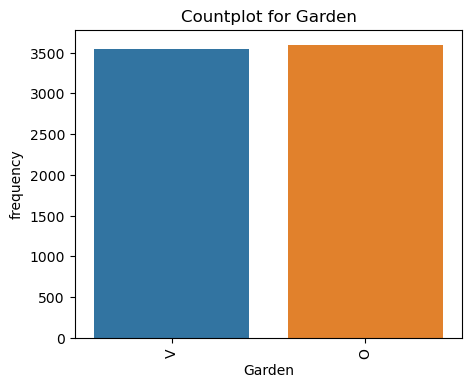

In [41]:
# Print the countplot gender
count_plot(data,'Garden')

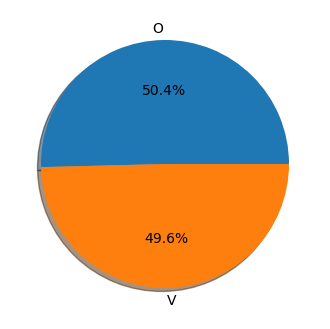

In [42]:
# Create a pie chart to show the percentage for Department 
plt.figure(figsize=(4,5))
values = data['Garden'].value_counts() /data.shape[0]
plt.pie(values,labels=values.keys(),autopct="%1.1f%%",shadow=True)
plt.show()

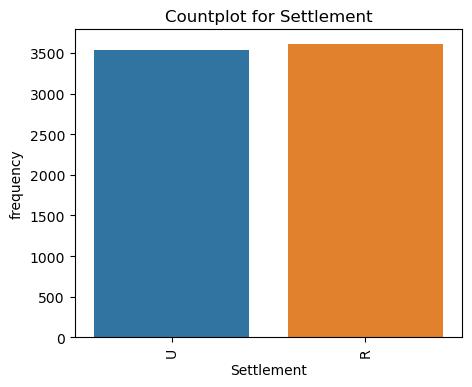

In [43]:
# Print the countplot for education field for employees
count_plot(data,'Settlement')

In [44]:
data['Settlement'].value_counts(normalize=True)

Settlement
R   0.505
U   0.495
Name: proportion, dtype: float64

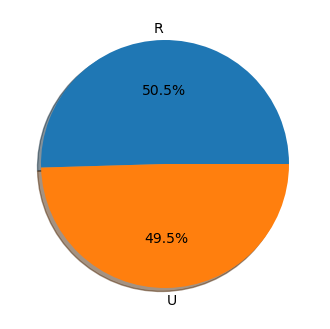

In [45]:
# Create a pie chart to show the percentage for Educational field 
plt.figure(figsize=(4,5))
values = data['Settlement'].value_counts()/data.shape[0]
plt.pie(values,labels=values.keys(),autopct="%1.1f%%",shadow=True)
plt.show()

## Bivariate data analysis:

#### Categorical and Numerical data analysis

In [ ]:
## Create a function to display boxplots for numerical and categorical dataset
def box_plot(data,item_1,categorical_item):
    plt.figure(figsize=(15,7))  # Increase the size of the plot
    sns.boxplot(data=data,x = item_1, y = categorical_item, palette = "Paired_r") 
    plt.title(f"The boxplot for {item_1} relative to {categorical_item}")
    plt.xlabel(item_1)
    plt.ylabel(categorical_item)
    plt.show()

In [ ]:
# Boxplot for Age relative to bank account 
box_plot(data,"Claim","Garden")

In [ ]:
train_data.columns

### Observation:


In [ ]:
# Boxplot for Age relative to gender
box_plot(data,"Claim","Building_Fenced")

### Observation:
The monthly income data relative to gender is skewed to the right with outliers on the right side of the whisker. <br>
However the average monthly income for females is higher than those of the males.<br>
75% of the females employees earn a monthly income of roughly 8750 dollar and above, which is higher than that of males.<br>
These means that females employees in the organisation earns more than males

In [ ]:
# Boxplot for Age relative to job type
box_plot(data,"Claim",'Building_Painted')

In [ ]:
# Boxplot for Age relative to Education level.
box_plot(data,"Age","Education_level")

In [ ]:
# Boxplot for Age relative to marital status.
box_plot(data,"Age","Status")

In [ ]:
# Boxplot for Age relative to country.
box_plot(data,"Age","Country")

In [ ]:
# Boxplot for Age relative to relationship.
box_plot(data,"Age","Relationship")

In [ ]:
# Boxplot for Age relative to cellphone access.
box_plot(data,"Age","Cellphone_access")

In [ ]:
# Boxplot for Age relative to Education level.
box_plot(data,"Age","Education_level")

In [ ]:
# Boxplot for size relative to bank account.
box_plot(data,"Size","Bank_account")

In [ ]:
# Boxplot for size relative to gender.
box_plot(data,"Size","Gender")

In [ ]:
# Boxplot for size relative to country.
box_plot(data,"Size","Country")

In [ ]:
# Boxplot for size relative to status
box_plot(data,"Size","Status")

### Observation:
On average sales employees earns higher monthly income as compared to those working in  R&D and Human resources.

In [ ]:
# Code to print the boxplot for numerical columns relative to categorical data
for variable in numerical_columns:
    box_plot(data,variable,categorical_data[0])

### Categorical data analysis only

In [ ]:
## Create a function to display a countplot for bivariate categorical columns relatives to churn data
def bivariate_plot(data,item_1,item_2,color):
    plt.figure(figsize=(10,7))
    sns.countplot(x=item_1,data=data,palette=color,hue=item_2)
    plt.ylabel("frequency")
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
bivariate_plot(data,"Bank_account","Gender",color="YlGnBu")

In [ ]:
round(data.groupby("Bank_account")["Gender"].value_counts(normalize=True),3)*100 

In [ ]:
bivariate_plot(data,"Bank_account","Country",color="terrain")

In [ ]:
round(data.groupby("Country")["Bank_account"].value_counts(normalize=True),3)*100 

In [ ]:
bivariate_plot(data,"Bank_account","Location_type",color="rainbow")

In [ ]:
round(data.groupby("Bank_account")["Job_type"].value_counts(normalize=True),3)*100 

In [ ]:
bivariate_plot(data,"Education_level","Bank_account",color="Purples_r")

In [ ]:
round(data.groupby("Bank_account")["Education_level"].value_counts(normalize=True),3)*100 

In [ ]:
bivariate_plot(data,"Status","Bank_account",color="Spectral")

### Numerical data

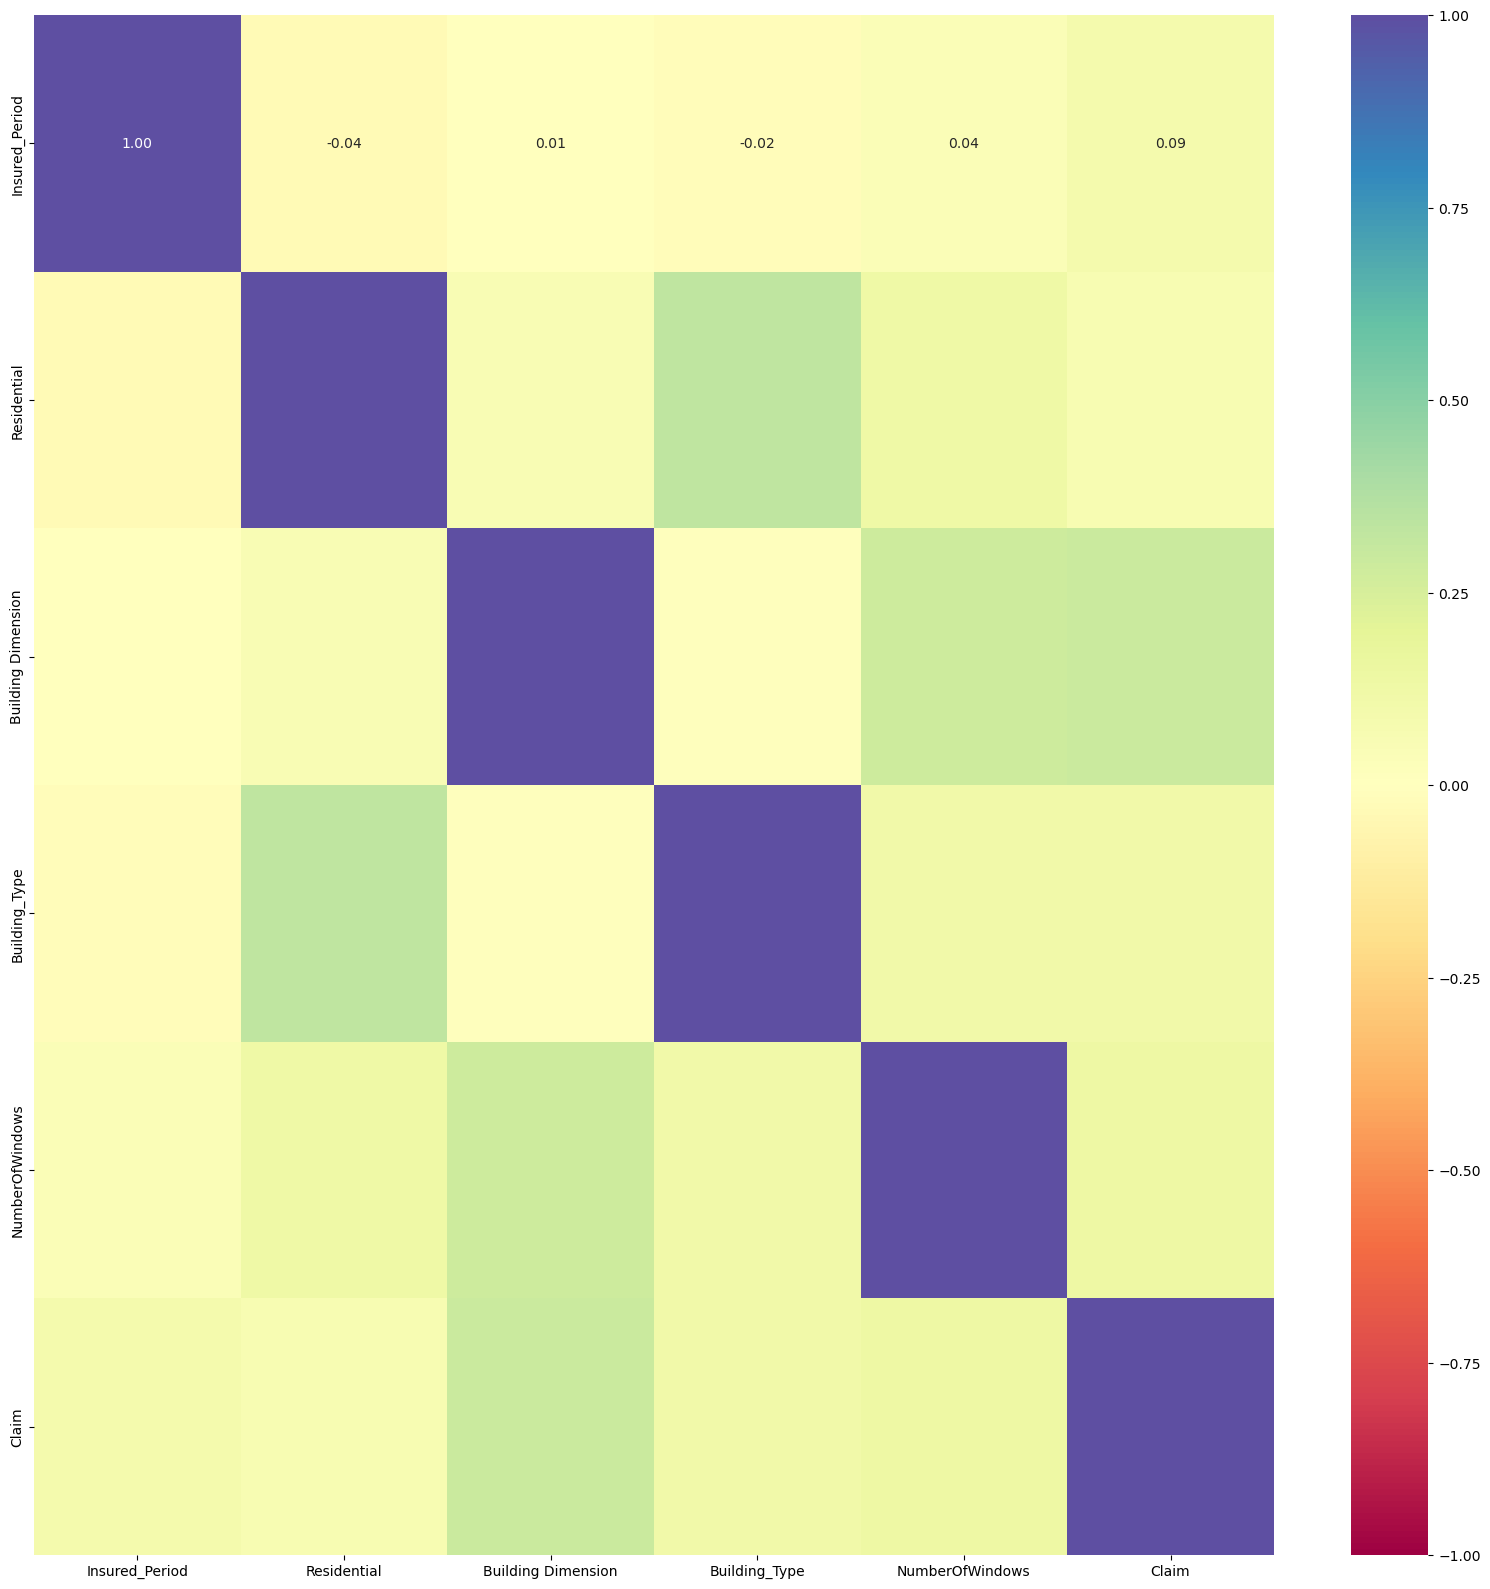

In [46]:
## Construct a correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(data[numerical_columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

## Observation:
* Most  of the independent variables are uncorrelated to each other, except for few variables.
* There is a very strong positive correlation between monthly income and job level. <br>
* There is a strong positive correlation between job level and total working years. <br>
* The job level,monthly income,Age and total working years are positively correlated to yearATCompany,YearsincurrentRole,YearsinceLastPromotion and YearswithcurrManager. <br>
* Age and total working years shows a positive correlation.

In [226]:
### Select columns that are highly correlated
def correlation(data,cut_off):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> cut_off:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [227]:
numerical_columns= data.select_dtypes("number").columns

In [228]:
### Now lets display the highly correlated columns
feature = correlation(data[numerical_columns],0.7)
print(feature)

set()


## Data preprocessing

### Feature engineering

#### OUTLIER DETECTION AND TREATMENT

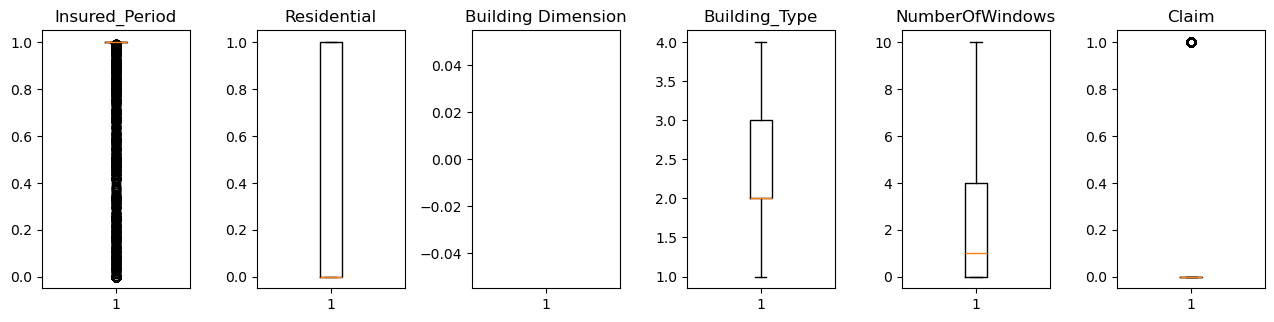

In [52]:
plt.figure(figsize=(15, 12))
for i, variable in enumerate(numerical_columns):
    plt.subplot(4,7, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

### Data Preparation:

#### Convert categorical  to numerical variables

In [229]:
data1 = data.copy()

In [ ]:
## Select categorical columns in the train dataset
categorical_columns_train = data1.select_dtypes("object").columns 

In [ ]:
categorical_columns_train

In [ ]:
# first create dummy variables for categorical data by dropping one of the columns in the training data
for variable in categorical_columns_train:
    
       data1[variable] = pd.factorize(data1[variable])[0]  

In [ ]:
data1.head()

In [ ]:
data1.shape

In [230]:
## Count the number of units in the banking account columns
data1["Claim"].value_counts()

Claim
0    5516
1    1632
Name: count, dtype: int64

### Observation:
The insurance dataset contain unbalanced claims data.

### Split the data into train and test sets

In [231]:
X = data1.drop(["Claim"], axis=1)
y = data1["Claim"]

In [232]:
X.shape

(7148, 12)

In [233]:
X.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,2013,1.000,0,N,V,V,U,290.000,1,1960.0,0,1053
1,2015,1.000,0,V,N,O,R,490.000,1,1850.0,4,1053
2,2014,1.000,0,N,V,V,U,595.000,1,1960.0,0,1053
3,2013,1.000,0,V,V,V,U,2840.000,1,1960.0,0,1053
4,2014,1.000,0,V,N,O,R,680.000,1,1800.0,3,1053


In [234]:
# Splitting the dataset into training and validation set into a ratio of 70:30 
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.30,random_state=1)

In [235]:
print(f"The training dataset consits of {X_train.shape[0]} rows and {X_train.shape[1]} columns")

The training dataset consits of 5003 rows and 12 columns


In [236]:
print(f"The validation dataset consists of {X_val.shape[0]} rows and {X_val.shape[1]} columns")

The validation dataset consists of 2145 rows and 12 columns


In [237]:
X.shape[0]

7148

### Normalize/standardize the data

In [239]:
# Scale the data using StandardScaler
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_val = scaler.transform(X_val)

In [240]:
test_data.shape

(3069, 12)

### Cleaning the testing dataset

In [144]:
### Cleaning the testing dataset
# Create a copy of the original dataset
#data_test1 = test_data.copy()
# Drop the Year and UniqueID columns
#data_test= data_test.drop(columns=["Year","UniqueID"],axis=1)
# Now select the categorical columns in the testing dataset
#categorical_test_column = data_test.select_dtypes("object").columns
# Now create the dummy variables on the categorical columns
#for variable in categorical_test_column:
    
       #data_test[variable] = pd.factorize(data_test[variable])[0]  

In [241]:
test_data.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,2013,1.000,0,V,N,O,R,300.000,1,1960.0,3,3310
1,2016,0.997,0,V,N,O,R,300.000,1,1960.0,3,3310
2,2013,0.370,0,V,V,V,U,790.000,1,1960.0,0,3310
3,2014,1.000,0,V,N,O,R,1405.000,1,2004.0,3,3321
4,2016,1.000,0,V,N,O,R,1405.000,1,2004.0,3,3321


In [242]:
test_data.shape

(3069, 12)

In [243]:
X_test = test_data

In [67]:
### Now normalize the testing dataset
#scaler = StandardScaler()
#X_test = scaler.fit_transform(X_test)

In [244]:
X_test.shape

(3069, 12)

In [245]:
data_test.shape

(3069, 13)

In [246]:
test_data.shape

(3069, 12)

## Data preprocessing

In [247]:
X_train.isnull().sum()/X_train.shape[0] *100

YearOfObservation    0.000
Insured_Period       0.000
Residential          0.000
Building_Painted     0.000
Building_Fenced      0.000
Garden               0.120
Settlement           0.000
Building Dimension   1.439
Building_Type        0.000
Date_of_Occupancy    0.000
NumberOfWindows      0.000
Geo_Code             1.379
dtype: float64

In [248]:
X_val.isnull().sum()/X_val.shape[0] *100

YearOfObservation    0.000
Insured_Period       0.000
Residential          0.000
Building_Painted     0.000
Building_Fenced      0.000
Garden               0.047
Settlement           0.000
Building Dimension   1.399
Building_Type        0.000
Date_of_Occupancy    0.000
NumberOfWindows      0.000
Geo_Code             1.352
dtype: float64

In [249]:
## Code to print the columns with missing values greater than 50%
col_feature=[] # create an empty list
for item in data.columns:
    if ((data[item].isnull().sum()/data.shape[0])>0.50):
        col_feature.append(item)  # append the columns with missing values greater than 50% in the list
print(col_feature) 

[]


In [250]:
### code to select the numerical columns in the training dataset
train_cols = X_train.select_dtypes("number").columns
# To impute missing values
from sklearn.impute import SimpleImputer

In [251]:
train_cols

Index(['Insured_Period', 'Residential', 'Building Dimension', 'Building_Type',
       'NumberOfWindows'],
      dtype='object')

### Perfom imputation of missing values in the training set 

In [252]:
## Instantiate the simple imputer 
median_imputer = SimpleImputer(missing_values=np.nan,strategy="median")
## Fit and transform the numerical columns in the training dataset
import time
startScript = time.time()
X_train[train_cols] = median_imputer.fit_transform(X_train[train_cols])
endScript = time.time()
display = endScript-startScript   # code to calculate the running time 
print(f"The running time:{round(display,4)}")

The running time:0.3093


In [253]:
### Imputation for categorical columns in the training dataset
## Select categorical columns and perform imputation
categorical_train_cols=X_train.select_dtypes("object").columns

In [254]:
categorical_train_cols

Index(['YearOfObservation', 'Building_Painted', 'Building_Fenced', 'Garden',
       'Settlement', 'Date_of_Occupancy', 'Geo_Code'],
      dtype='object')

In [255]:
## Instantiate the simple imputer 
mode_imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
## Fit and transform the numerical columns in the training dataset
import time
startScript = time.time()
X_train[categorical_train_cols] = mode_imputer.fit_transform(X_train[categorical_train_cols])
endScript = time.time()
display = endScript-startScript   # code to calculate the running time 
print(f"The running time:{round(display,4)}")

The running time:0.0481


### Perfom imputation of missing values in the validation set

In [256]:
## Instantiate the simple imputer 
median_imputer = SimpleImputer(missing_values=np.nan,strategy="median")
## Fit and transform the numerical columns in the training dataset
import time
startScript = time.time()
X_val[train_cols] = median_imputer.fit_transform(X_val[train_cols])
endScript = time.time()
display = endScript-startScript   # code to calculate the running time 
print(f"The running time:{round(display,4)}")

The running time:0.0161


In [257]:
## Instantiate the simple imputer 
mode_imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
## Fit and transform the numerical columns in the training dataset
import time
startScript = time.time()
X_val[categorical_train_cols] = mode_imputer.fit_transform(X_val[categorical_train_cols])
endScript = time.time()
display = endScript-startScript   # code to calculate the running time 
print(f"The running time:{round(display,4)}")

The running time:0.0161


### Perfom imputation of missing values in the testing set

In [258]:
## Instantiate the simple imputer 
median_imputer = SimpleImputer(missing_values=np.nan,strategy="median")
## Fit and transform the numerical columns in the training dataset
import time
startScript = time.time()
X_test[train_cols] = median_imputer.fit_transform(X_test[train_cols])
endScript = time.time()
display = endScript-startScript   # code to calculate the running time 
print(f"The running time:{round(display,4)}")

The running time:0.008


In [259]:
## Instantiate the simple imputer 
mode_imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
## Fit and transform the numerical columns in the training dataset
import time
startScript = time.time()
X_test[categorical_train_cols] = mode_imputer.fit_transform(X_test[categorical_train_cols])
endScript = time.time()
display = endScript-startScript   # code to calculate the running time 
print(f"The running time:{round(display,4)}")

The running time:0.015


### Model Building

## Performance measures description:
* Mean Absolute Error: The sum of the absolute difference of the predicted values and the target values divided by the number of observations. <br>
* The lower the mean absolute error the good model to use for prediction.<br>
* True positive(TP): The model predict that the respondent has a bank account(Yes) and in reality he/she has the bank account(Yes).<br>
* False positive(FP): The model predict an employee attrition(Yes) and in reality it there is no attrition(No).<br>
* False negative(FN): The model predict no employee attrition(No) and the reality there is an employee attrition(Yes).<br>
* True negative(TN): The model predict no employee attrition(No) and in reality there is no attrition(No).<br>
* Accuracy = (TP+TN)/(TP+FP+FN+TN)
* Recall =(TP)/(TP+FN)
* Precision =(FP/FP+TN)
* F1 score: This score minimize both the False negative(FN) and False Positive(FN),the higher the better
* The values can computed using a confusion matrix

In [260]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):

        # predicting using the independent variables
        pred = model.predict(predictors)
        acc = accuracy_score(target, pred)  # to compute Accuracy using target and predicted values
        recall = recall_score(target, pred)  # to compute Recall using target and predicted values
        precision = precision_score(target, pred)  # to compute Precision using target and predicted values
        f1 = f1_score(target, pred)  # to compute F1-score using target and predicted values

        # creating a dataframe of metrics
        df_perf = pd.DataFrame( {"Accuracy": acc,"Recall": recall,"Precision": precision,"F1": f1},index=[0],)

        return df_perf

In [261]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

### Model Building on original data

In [262]:
### Code to select all the features on the training dataset
features = list(X_train.columns)

In [263]:
features

['YearOfObservation',
 'Insured_Period',
 'Residential',
 'Building_Painted',
 'Building_Fenced',
 'Garden',
 'Settlement',
 'Building Dimension',
 'Building_Type',
 'Date_of_Occupancy',
 'NumberOfWindows',
 'Geo_Code']

In [264]:
X_train["Residential"].unique()

array([0., 1.])

In [265]:
### Code to select categorical features
cat_features = np.where(X_train.dtypes !=float)[0]

In [266]:
cat_features

array([ 0,  3,  4,  5,  6,  9, 11], dtype=int64)

In [ ]:
od_type ='Iter',    # Overfit detector
od_wait = 20,  # most recent best iteration to wait before stopping
od_type ='Iter',    # Overfit detector
metric_period 

In [267]:
from catboost import CatBoostClassifier

In [316]:
### Instantiate the Catboost model
model = CatBoostClassifier( iterations=5000,eval_metric="AUC",
                          learning_rate=0.008, depth=2,
                          random_seed = 20,    
                          verbose=True,
                           metric_period=20,
                          use_best_model=True,
                )
### Now fit the model in the training dataset
cat_model = model.fit(X_train,y_train,cat_features= cat_features,use_best_model=True,plot=True,
                     eval_set= (X_val,y_val))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.6247463	best: 0.6247463 (0)	total: 19.1ms	remaining: 1m 35s
20:	test: 0.7185597	best: 0.7185597 (20)	total: 441ms	remaining: 1m 44s
40:	test: 0.7160189	best: 0.7185597 (20)	total: 930ms	remaining: 1m 52s
60:	test: 0.7202465	best: 0.7202465 (60)	total: 1.47s	remaining: 1m 58s
80:	test: 0.7200076	best: 0.7202465 (60)	total: 1.89s	remaining: 1m 55s
100:	test: 0.7208345	best: 0.7208345 (100)	total: 2.28s	remaining: 1m 50s
120:	test: 0.7210741	best: 0.7210741 (120)	total: 2.74s	remaining: 1m 50s
140:	test: 0.7210646	best: 0.7210741 (120)	total: 3.15s	remaining: 1m 48s
160:	test: 0.7213634	best: 0.7213634 (160)	total: 3.54s	remaining: 1m 46s
180:	test: 0.7217706	best: 0.7217706 (180)	total: 3.93s	remaining: 1m 44s
200:	test: 0.7223038	best: 0.7223038 (200)	total: 4.32s	remaining: 1m 43s
220:	test: 0.7228761	best: 0.7228761 (220)	total: 4.72s	remaining: 1m 42s
240:	test: 0.7235147	best: 0.7235147 (240)	total: 5.13s	remaining: 1m 41s
260:	test: 0.7233451	best: 0.7235147 (240)	total:

2200:	test: 0.7318979	best: 0.7319017 (2180)	total: 55s	remaining: 1m 9s
2220:	test: 0.7319042	best: 0.7319042 (2220)	total: 55.8s	remaining: 1m 9s
2240:	test: 0.7319723	best: 0.7319723 (2240)	total: 56.6s	remaining: 1m 9s
2260:	test: 0.7319092	best: 0.7319723 (2240)	total: 57.5s	remaining: 1m 9s
2280:	test: 0.7319899	best: 0.7319899 (2280)	total: 58.2s	remaining: 1m 9s
2300:	test: 0.7321891	best: 0.7321891 (2300)	total: 58.8s	remaining: 1m 8s
2320:	test: 0.7321034	best: 0.7321891 (2300)	total: 59.6s	remaining: 1m 8s
2340:	test: 0.7320807	best: 0.7321891 (2300)	total: 1m	remaining: 1m 8s
2360:	test: 0.7321185	best: 0.7321891 (2300)	total: 1m 1s	remaining: 1m 8s
2380:	test: 0.7321097	best: 0.7321891 (2300)	total: 1m 2s	remaining: 1m 8s
2400:	test: 0.7320567	best: 0.7321891 (2300)	total: 1m 2s	remaining: 1m 7s
2420:	test: 0.7320983	best: 0.7321891 (2300)	total: 1m 3s	remaining: 1m 7s
2440:	test: 0.7320303	best: 0.7321891 (2300)	total: 1m 3s	remaining: 1m 6s
2460:	test: 0.7319887	best: 0.

4380:	test: 0.7302603	best: 0.7321891 (2300)	total: 1m 54s	remaining: 16.2s
4400:	test: 0.7302175	best: 0.7321891 (2300)	total: 1m 55s	remaining: 15.7s
4420:	test: 0.7301973	best: 0.7321891 (2300)	total: 1m 55s	remaining: 15.1s
4440:	test: 0.7301796	best: 0.7321891 (2300)	total: 1m 55s	remaining: 14.6s
4460:	test: 0.7301305	best: 0.7321891 (2300)	total: 1m 56s	remaining: 14s
4480:	test: 0.7301179	best: 0.7321891 (2300)	total: 1m 56s	remaining: 13.5s
4500:	test: 0.7300864	best: 0.7321891 (2300)	total: 1m 57s	remaining: 13s
4520:	test: 0.7299943	best: 0.7321891 (2300)	total: 1m 57s	remaining: 12.4s
4540:	test: 0.7299590	best: 0.7321891 (2300)	total: 1m 57s	remaining: 11.9s
4560:	test: 0.7298985	best: 0.7321891 (2300)	total: 1m 58s	remaining: 11.4s
4580:	test: 0.7298531	best: 0.7321891 (2300)	total: 1m 59s	remaining: 10.9s
4600:	test: 0.7298103	best: 0.7321891 (2300)	total: 1m 59s	remaining: 10.4s
4620:	test: 0.7297712	best: 0.7321891 (2300)	total: 2m	remaining: 9.89s
4640:	test: 0.729708

In [317]:
## Code to check the performance on the oversampled training set
cat_train_perf = model_performance_classification_sklearn(cat_model, X_train, y_train)
## Code to check the performance on validation
cat_val_perf = model_performance_classification_sklearn(cat_model,X_val,y_val) 

In [318]:
cat_perf= pd.concat([cat_train_perf.T,cat_val_perf.T],axis=1)
cat_perf.columns=["Training","Validation"]

In [319]:
print("Catboost Performance Measures Using the Original data")
cat_perf

Catboost Performance Measures Using the Original data


,Training,Validation
Accuracy,0.791,0.794
Recall,0.206,0.183
Precision,0.650,0.621
F1,0.313,0.283


### Model Building with oversampled data

In [281]:
# To oversample and undersample data
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [283]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5003 entries, 3607 to 5164
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearOfObservation   5003 non-null   object 
 1   Insured_Period      5003 non-null   float64
 2   Residential         5003 non-null   float64
 3   Building_Painted    5003 non-null   object 
 4   Building_Fenced     5003 non-null   object 
 5   Garden              5003 non-null   object 
 6   Settlement          5003 non-null   object 
 7   Building Dimension  5003 non-null   float64
 8   Building_Type       5003 non-null   float64
 9   Date_of_Occupancy   5003 non-null   object 
 10  NumberOfWindows     5003 non-null   float64
 11  Geo_Code            5003 non-null   object 
dtypes: float64(5), object(7)
memory usage: 508.1+ KB


In [ ]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)
X_val_over, y_val_over = sm.fit_resample(X_val, y_val)

In [ ]:
### Instantiate the Catboost model
model = CatBoostClassifier(  iterations=5000,eval_metric="AUC",
                          learning_rate=0.001, depth=2,
                          random_seed = 20,    
                          verbose=True,
                          use_best_model=True,
                         )
### Now fit the model in the training dataset
cat_model_over = model.fit(X_train_over,y_train_over,cat_features= cat_features,use_best_model=True,plot=True,
                     eval_set= (X_val_over,y_val_over))

In [ ]:
params = {'iterations':5,
         'learning_rate':0.5,
          'cat_features':cat_features,
          'depth':2,
          'eval_metric':'AUC',
          'verbose':True,
         
         }
model_classifier = CatBoostClassifier(**params)
model_classifier.fit(X_train,y_train,eval_set= (X_val,y_val),t_model=True,plot=True)

In [ ]:
## Code to check the performance on the oversampled training set
cat_train_perf_over = model_performance_classification_sklearn(cat_model_over, X_train_over, y_train_over)
## Code to check the performance on validation
cat_val_perf_over = model_performance_classification_sklearn(cat_model_over,X_val_over,y_val_over) 

In [ ]:
cat_perf_over=pd.concat([cat_train_perf_over.T,cat_val_perf_over.T],axis=1)
cat_perf_over.columns=["Training","Validation"]

In [ ]:
print("Catboost Performance measures using Over-Sampled Data")
cat_perf_over

### Feature Importances

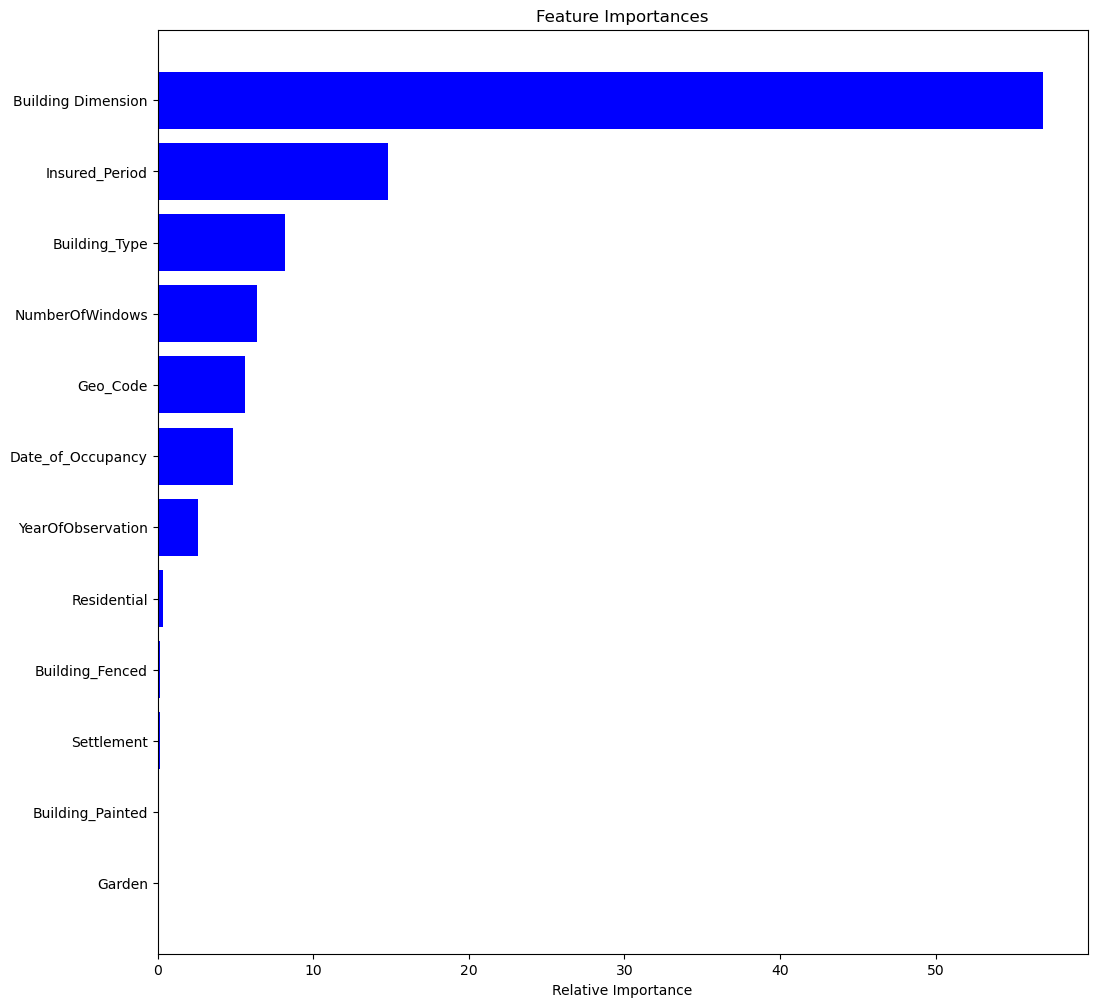

In [320]:
 ## Code to check the feature importance on the best model
feature_names = features
importances =  cat_model.feature_importances_  
indices = np.argsort(importances)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [321]:
data_test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H11920,2013,1.000,0,V,N,O,R,300.000,1,1960.000,3,3310,0
1,H11921,2016,0.997,0,V,N,O,R,300.000,1,1960.000,3,3310,0
2,H9805,2013,0.370,0,V,V,V,U,790.000,1,1960.000,.,3310,0
3,H7493,2014,1.000,0,V,N,O,R,1405.000,1,2004.000,3,3321,0
4,H7494,2016,1.000,0,V,N,O,R,1405.000,1,2004.000,3,3321,0


In [322]:
data_test.shape

(3069, 14)

In [323]:
# Code   to predict  the target  variable using the best model on the  testing dataset
data_test["Claim"] = cat_model.predict(X_test)

In [324]:
data_test["Claim"].value_counts(normalize=True)

Claim
0   0.943
1   0.057
Name: proportion, dtype: float64

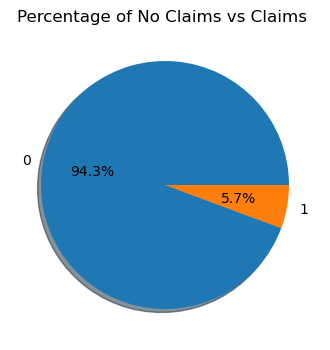

In [325]:
# Create a pie chart to show the percentage for the target column
plt.figure(figsize=(4,5))
values = data_test["Claim"].value_counts() /data_test.shape[0]
plt.pie(values,labels=values.keys(),autopct="%1.1f%%",shadow=True)
plt.title("Percentage of No Claims vs Claims ")
plt.show()

In [326]:
data_df =pd.DataFrame({"Customer ID":data_test['Customer Id'],"Claim":data_test["Claim"]})

In [327]:
data_df.head()

,Customer ID,Claim
0,H11920,0
1,H11921,0
2,H9805,0
3,H7493,0
4,H7494,0


In [328]:
 # code to save the predicted dataset as a csv file
data_df.to_csv("Submission_file(Insurance2).csv",index=False)

### Insights and conclusions